# Q&A Activity Question Week -06

In [ ]:
# Get current working directory and paste the spreadsheet. Once pasted, read the spreadsheet and import all relevant libraries

In [2]:
import os
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the xls sheet to a variable named spreadsheet
spreadsheet = pd.ExcelFile(r"Dataset_w6.xlsx")
#Move the first sheet (with index value 0) to sstab1 
country_data = spreadsheet.parse(0)
country_data

C:\Users\The.Maqtron


,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,11068.9,118,16324
192,Viet Nam,South-easternAsia,330967,95541,2067.9,136,174111
193,Yemen,WesternAsia,527968,28250,1106.4,136,6861
194,Zambia,EasternAfrica,752612,17094,1311.1,179,7442


# 1. Find out how many countries are there in the dataset.


In [3]:
#Use the describe function over the country column to find the count of countries . 
country_data['country'].describe()

count                     196
unique                    196
top       Antigua and Barbuda
freq                        1
Name: country, dtype: object

# Insight:
     It is evident that there are 196 unique countries in the dataset

# 2. Examine the data by using visualizations.


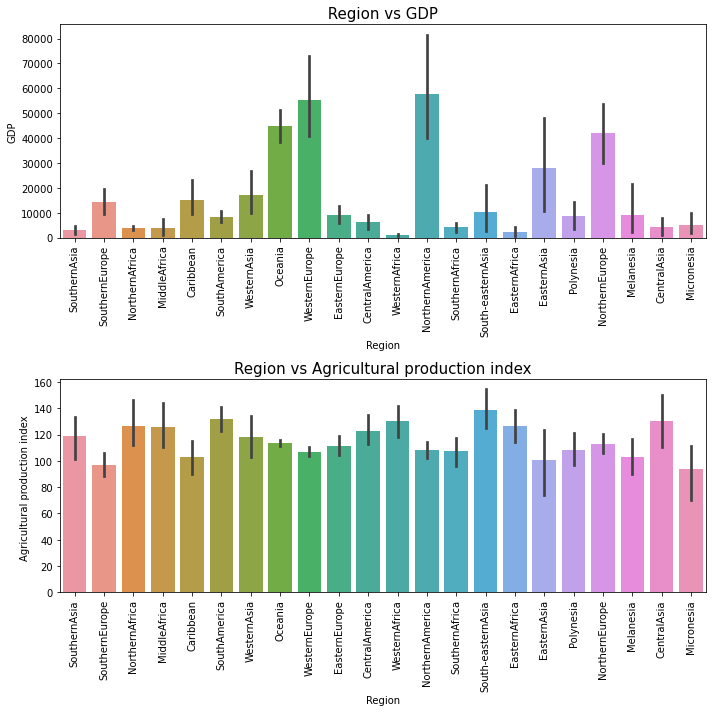

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.barplot(x = 'Region', y = 'GDP per capita (current US$)',data = country_data)
plt.title(' Region vs GDP ',fontsize = 15)
plt.xlabel('Region')
plt.ylabel('GDP')
plt.xticks(rotation = 90)

plt.subplot(2,1,2)
sns.barplot(x = 'Region', y = 'Agricultural production index ',data = country_data)
plt.title('Region vs Agricultural production index',fontsize = 15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# INSIGHTS :
Top 3 regions with high GDP are Northern America , Western Europe & Oceania respectively. &
Top 3 regions With higher  Agricultural production index are South-eastern asia , central asia & EasternAsia respectively.
So , its shows that the  the Agricultural production index is not making any effect on the GDP of the region.

# 3 Find out how many countries with respect to Regions are there in the dataset

In [4]:
# We can use the combinations of groupby & describe functions to get the counts & unique counts wrt region
country_data.groupby(['Region'])['country'].describe()

,count,unique,top,freq
Region,,,,
Caribbean,16,16,Antigua and Barbuda,1
CentralAmerica,8,8,Panama,1
CentralAsia,5,5,Uzbekistan,1
EasternAfrica,17,17,Malawi,1
EasternAsia,7,7,"China, Macao SAR",1
EasternEurope,10,10,Bulgaria,1
Melanesia,5,5,Fiji,1
Micronesia,4,4,Micronesia (Federated States of),1
MiddleAfrica,9,9,Angola,1


# Insight:
    The above shows the count & unique counts of the number of countries with respect to each region

# 4. On average which region has the highest
◉ a) GDP Per capita (Current US Dollar )    
◉ b ) International Trade Imports

In [8]:
# create a data frame of Region and mean GDP per capita of that region
rgn_gdp_data = country_data.groupby(['Region'])['GDP per capita (current US$)'].mean().reset_index()
# get the top 5 regions based on GDP Per capita
rgn_highest_gdp = rgn_gdp_data.nlargest(5,'GDP per capita (current US$)')
# Display the 5 regions
rgn_highest_gdp


,Region,GDP per capita (current US$)
10,NorthernAmerica,57659.000000
21,WesternEurope,55387.128571
12,Oceania,44823.250000
11,NorthernEurope,42098.220000
4,EasternAsia,27967.614286


# Insights:
    It is clear that Northern america has the highest GDP Per capita 

In [9]:
# create a data frame of Region and sum of imports
rgn_itd_data = country_data.groupby(['Region'])['International trade: Imports (million US$)'].sum().reset_index()
# get the top 5 regions based on import sum 
rgn_itd_top = rgn_itd_data.nlargest(5,'International trade: Imports (million US$)')
# Display the top 5 regions
rgn_itd_top

,Region,International trade: Imports (million US$)
4,EasternAsia,3163965
21,WesternEurope,2852489
10,NorthernAmerica,2654209
11,NorthernEurope,1134072
14,South-easternAsia,1081571


# Insights:
    It is clear that the Eastern Asia has the largest import dollars

# 5. Find out which region has more consistent wrt GDP Per capita ( Current USD )

In [10]:
# Group the regions based on the value of standard devation of GDP Per capita
Region_GDP_PC = country_data.groupby(['Region'])['GDP per capita (current US$)'].std().reset_index()
#Find the 5 Regions having smallest standard devations for GDP Per capita  
Region_GDP_consistent = Region_GDP_PC.nsmallest(5,'GDP per capita (current US$)')
# Display the most consistent regions
Region_GDP_consistent

,Region,GDP per capita (current US$)
19,WesternAfrica,815.095399
9,NorthernAfrica,974.706575
16,SouthernAfrica,2177.551120
17,SouthernAsia,2855.708179
3,EasternAfrica,3716.131770


# Insights:
        The above data shows that Western africa has more consistent GDP per capita

# Top five regions having wrt Agri Produce index

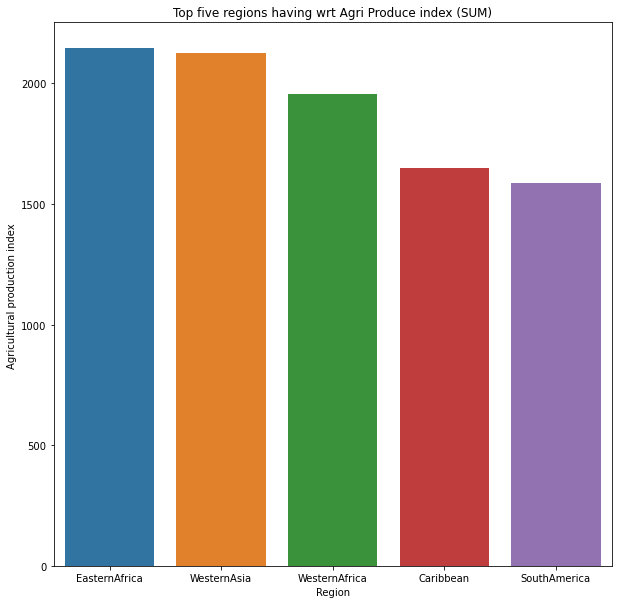

In [11]:
Region_agri = pd.DataFrame(country_data.groupby(['Region'])['Agricultural production index '].sum()).reset_index()

Region_agri_top = Region_agri.sort_values(by="Agricultural production index ",ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.barplot(x="Region",y="Agricultural production index ",data=Region_agri_top)
plt.title("Top five regions having wrt Agri Produce index (SUM)")
plt.show()

# Five regions having wrt Low Agri Produce index

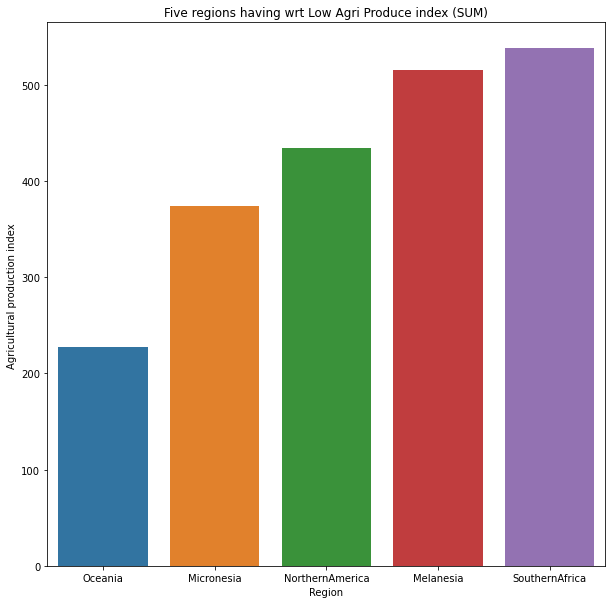

In [12]:
Region_agri_bottom = Region_agri.sort_values(by="Agricultural production index ",ascending=True).head(5)

plt.figure(figsize=(10,10))
sns.barplot(x="Region",y="Agricultural production index ",data=Region_agri_bottom)
plt.title("Five regions having wrt Low Agri Produce index (SUM)")
plt.show()

# Densely populated regions

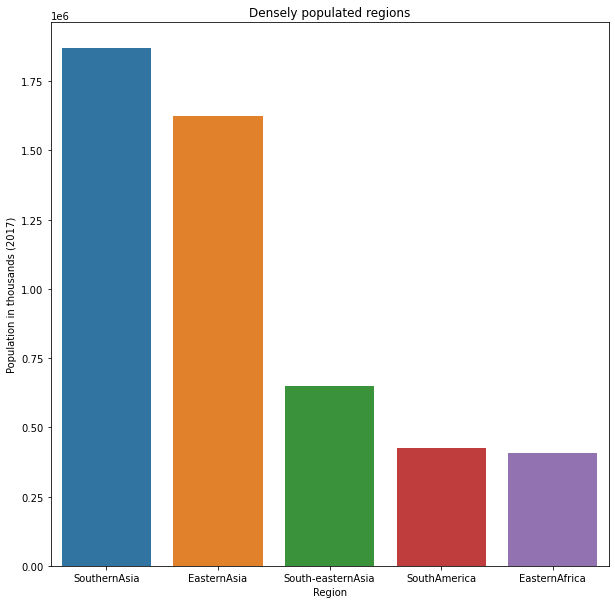

In [13]:
Region_population = pd.DataFrame(country_data.groupby(['Region'])['Population in thousands (2017)'].sum()).reset_index()

Region_population_top = Region_population.sort_values(by="Population in thousands (2017)",ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.barplot(x="Region",y="Population in thousands (2017)",data=Region_population_top)
plt.title("Densely populated regions")
plt.show()

# Regions with low population

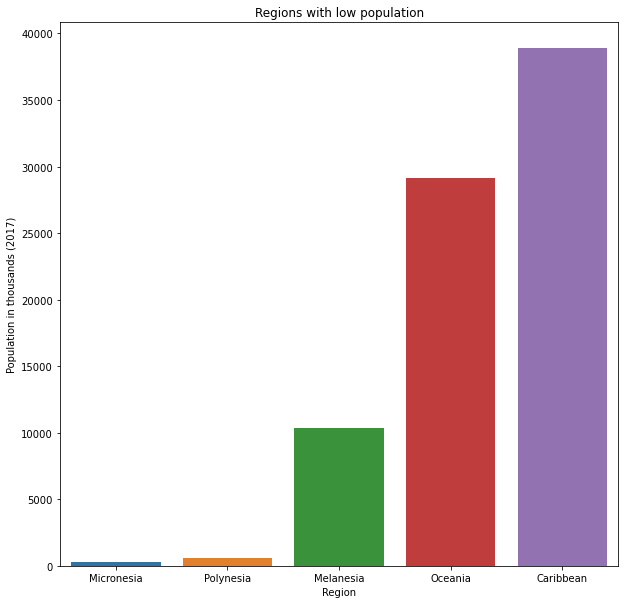

In [14]:
Region_population = pd.DataFrame(country_data.groupby(['Region'])['Population in thousands (2017)'].sum()).reset_index()

Region_population_low = Region_population.sort_values(by="Population in thousands (2017)",ascending=True).head(5)

plt.figure(figsize=(10,10))
sns.barplot(x="Region",y="Population in thousands (2017)",data=Region_population_low)
plt.title("Regions with low population")
plt.show()

# High Importing Countries

Text(0, 0.5, 'Imports in million')

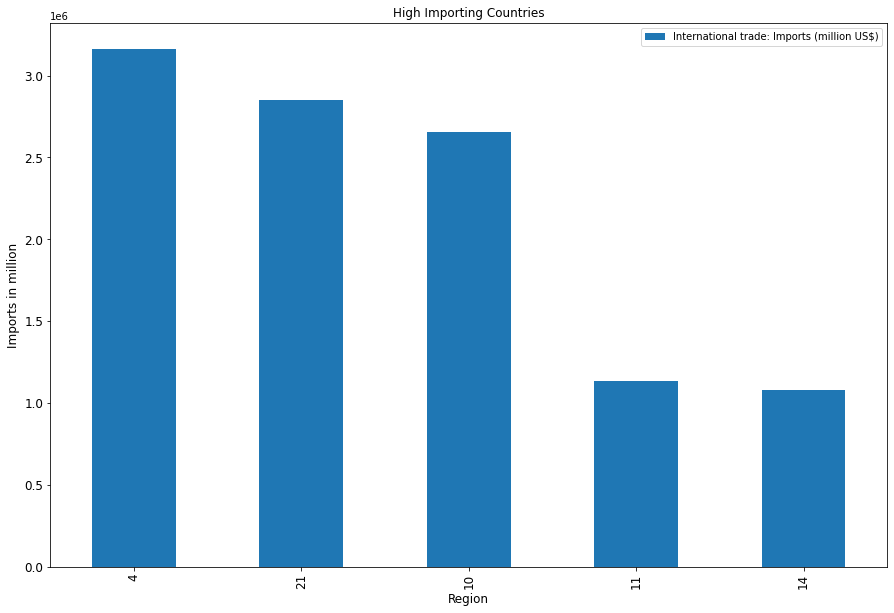

In [15]:
Region_Imports =  pd.DataFrame(country_data.groupby(['Region'])['International trade: Imports (million US$)'].sum()).reset_index()
Region_Imports_high = Region_Imports.sort_values(by="International trade: Imports (million US$)",ascending=False).head(5)
ax = Region_Imports_high[['International trade: Imports (million US$)']].plot(kind='bar', title ="High Importing Countries", 
    figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Imports in million", fontsize=12)

# Top 5 Importers

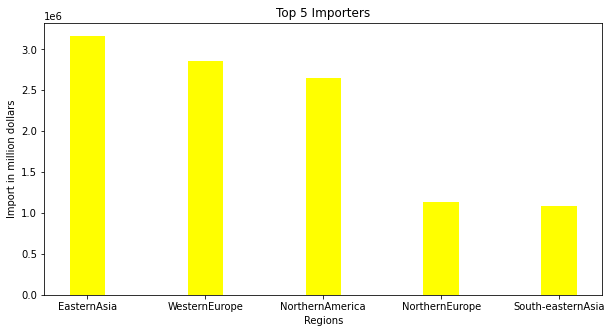

In [16]:
Region_Imports =  pd.DataFrame(country_data.groupby(['Region'])['International trade: Imports (million US$)'].sum()).reset_index()
Region_Imports_high = Region_Imports.sort_values(by="International trade: Imports (million US$)",ascending=False).head(5)

xRegions = Region_Imports_high['Region']
yImports = Region_Imports_high['International trade: Imports (million US$)']
fig = plt.figure(figsize=(10,5))
plt.bar(xRegions,yImports,color='yellow',width=0.3)
plt.xlabel("Regions")
plt.ylabel("Import in million dollars")
plt.title("Top 5 Importers")
plt.show()

# Wealthiest regions

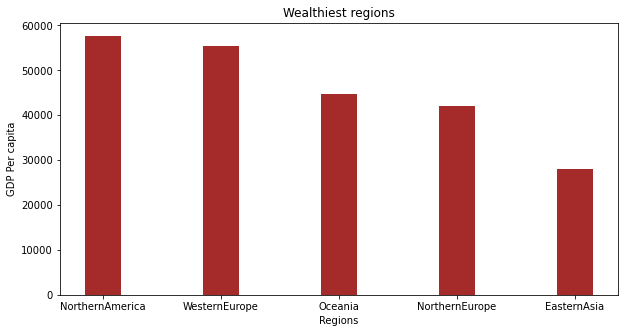

In [21]:
Region_GDP =  pd.DataFrame(country_data.groupby(['Region'])['GDP per capita (current US$)'].mean()).reset_index()
Region_GDP_high = Region_GDP.sort_values(by="GDP per capita (current US$)",ascending=False).head(5)

xRegions = Region_GDP_high['Region']
yGDP = Region_GDP_high['GDP per capita (current US$)']
fig = plt.figure(figsize=(10,5))
plt.bar(xRegions,yGDP,color='brown',width=0.3)
plt.xlabel("Regions")
plt.ylabel("GDP Per capita")
plt.title("Wealthiest regions")
plt.show()


# Poorest regions

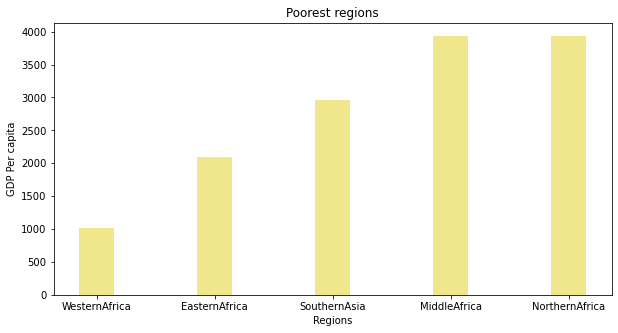

In [18]:
Region_GDP =  pd.DataFrame(country_data.groupby(['Region'])['GDP per capita (current US$)'].mean()).reset_index()
Region_GDP_low = Region_GDP.sort_values(by="GDP per capita (current US$)",ascending=True).head(5)

xRegions = Region_GDP_low['Region']
yGDP = Region_GDP_low['GDP per capita (current US$)']
fig = plt.figure(figsize=(10,5))
plt.bar(xRegions,yGDP,color='khaki',width=0.3)
plt.xlabel("Regions")
plt.ylabel("GDP Per capita")
plt.title("Poorest regions")
plt.show()